In [1]:
import sklearn as sl
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## import data

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
data_list = [train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Train data missed values:\n")
print(train.isnull().sum())
print('\n','#'*50 , '\n')
print("Test data missed values:")
print(test.isnull().sum())

Train data missed values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ################################################## 

Test data missed values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## drop useless columns & fill null

In [6]:
train.drop(columns = ["PassengerId"] , inplace = True)

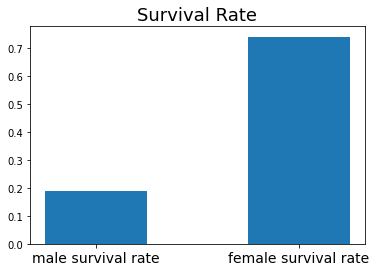

In [7]:
male_survived = train[train['Sex'] == 'male']['Survived'].mean()
female_survived = train[train['Sex'] == 'female']['Survived'].mean()
labels = ['male survival rate','female survival rate']
bars = [male_survived,female_survived]
plt.bar(labels,bars,width=0.5)
plt.xticks(fontsize=14)
plt.title('Survival Rate',fontsize=18)
plt.show()

### take first char from cabin to reduce the unique values

In [8]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin']])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [9]:
cab_df = train.groupby('Cabin')['Survived'].mean()
cab_df = cab_df.to_frame()
cab_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
X,0.299854


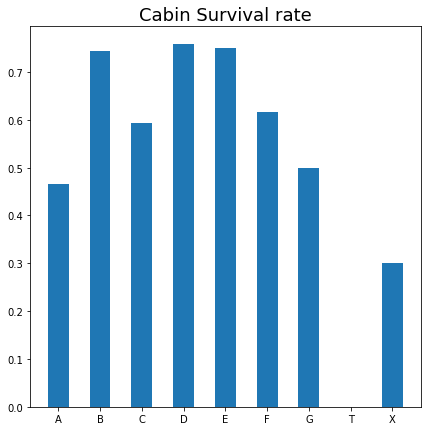

In [10]:
plt.figure(figsize=(7,7))
plt.bar(cab_df.index,cab_df.Survived,width=0.5)
plt.title('Cabin Survival rate',fontsize=18)
plt.show()

## convert data to numerical 

In [11]:
train.Embarked.fillna(train.Embarked.dropna().max(), inplace=True)


In [12]:
for dataset in data_list:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int) 

## reduce title unique values

In [14]:
train["Title"] =train["Name"].str.extract('([A-Za-z]+)\.')
test["Title"] = test["Name"].str.extract('([A-Za-z]+)\.')

train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [15]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"

for dataset in data_list:
    dataset["Title"] = dataset["Title"].map(convert_title)
train["Title"].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: Title, dtype: int64

In [16]:
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.816327
Mr        32.368090
Mrs       35.788991
Other     43.750000
Name: Age, dtype: float64

In [17]:
for df in data_list:
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Master'), 'Age'] = 5
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Miss'), 'Age'] = 22
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mr'), 'Age'] = 32
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mrs'), 'Age'] = 36
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Other'), 'Age'] = 44

In [18]:
print(train.isnull().sum())
print("-" * 50)
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64


In [19]:
test.Fare.fillna(test.Fare.dropna().median() , inplace= True)

In [20]:
for dataset in data_list:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
test.drop(['Parch', 'SibSp'], axis=1 , inplace = True)    

temp_df = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

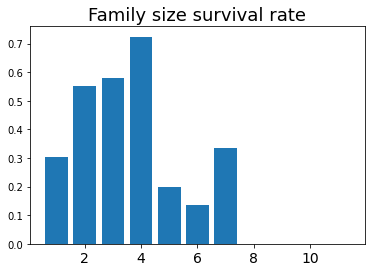

In [23]:
plt.bar(temp_df.FamilySize,temp_df.Survived,width=0.8)
plt.title('Family size survival rate',fontsize=18)
plt.xticks(fontsize=14)
plt.show()

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,S,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,C,Mrs,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C,S,Mrs,2
4,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,S,Mr,1


### seperate every category in columns

In [25]:
cats=['Embarked','Title','Cabin']
for cat in cats:
    train = pd.concat([train, pd.get_dummies(train[cat], prefix=cat)], axis=1)
    train = train.drop([cat], axis=1)
    test = pd.concat([test, pd.get_dummies(test[cat], prefix=cat)], axis=1)
    test = test.drop([cat], axis=1)

### swap Cabin_T , Cabin_X

In [26]:
test['Cabin_T']= np.zeros(len(test))
test['Cabin_T']=test['Cabin_T'].astype(int)
cols = list(test.columns)
a, b = cols.index('Cabin_T'), cols.index('Cabin_X')
cols[b], cols[a] = cols[a], cols[b]
test = test[cols]

In [27]:
train.drop(['Name'], axis=1 , inplace = True)
test.drop(['Name'], axis=1 , inplace = True)    

In [28]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,...,Title_Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,A/5 21171,7.2500,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,PC 17599,71.2833,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,STON/O2. 3101282,7.9250,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,113803,53.1000,2,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,373450,8.0500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,...,Title_Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,892,3,1,34.5,330911,7.8292,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,893,3,0,47.0,363272,7.0000,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,894,2,1,62.0,240276,9.6875,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,895,3,1,27.0,315154,8.6625,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,896,3,0,22.0,3101298,12.2875,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# train_cols =[]
# for col in train.columns:
#     if col not in test.columns:
#         train_cols.append(col)

In [31]:
# test_cols =[]
# for col in test.columns:
#     if col not in train.columns:
#         test_cols.append(col)

In [32]:
# print(test_cols)
# print(train_cols)

In [33]:
for dataset in [train,test]:
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [34]:
train.drop(columns = ["FamilySize"] , inplace = True)
test.drop(columns = ["FamilySize"] , inplace = True)

In [35]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Single,SmallF,MedF,LargeF
0,0,3,1,22.0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,0,38.0,PC 17599,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,26.0,STON/O2. 3101282,7.9250,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,0,35.0,113803,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,1,35.0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [36]:
for dataset in [train,test]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Single,SmallF,MedF,LargeF
0,0,3,1,1.0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,0,2.0,PC 17599,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,1.0,STON/O2. 3101282,7.9250,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,0,2.0,113803,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,1,2.0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [37]:
print(train.isnull().sum())
print("-" * 50)
print(test.isnull().sum())

Survived        0
Pclass          0
Sex             0
Age             0
Ticket          0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Cabin_X         0
Single          0
SmallF          0
MedF            0
LargeF          0
dtype: int64
--------------------------------------------------
PassengerId     0
Pclass          0
Sex             0
Age             0
Ticket          0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Cabin_X         0
Single          0
SmallF          0


In [38]:
for dataset in [train,test]:
    dataset['Age']=dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Single,SmallF,MedF,LargeF
0,0,3,1,1,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,0,2,PC 17599,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,1,STON/O2. 3101282,7.9250,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,0,2,113803,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,1,2,373450,8.0500,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [39]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [40]:
for dataset in [train,test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [41]:
print(test.shape)
print(train.shape)

(418, 27)
(891, 27)


In [42]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Single,SmallF,MedF,LargeF
0,0,3,1,1,A/5 21171,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,0,2,PC 17599,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,1,STON/O2. 3101282,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,0,2,113803,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,1,2,373450,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


### i will append test to train to avoide columns Mismatch,then i will split them again

In [43]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Single,SmallF,MedF,LargeF
0,0,3,1,1,A/5 21171,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,0,2,PC 17599,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,0,1,STON/O2. 3101282,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,0,2,113803,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,1,2,373450,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [44]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Single,SmallF,MedF,LargeF
0,892,3,1,2,330911,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,893,3,0,2,363272,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,894,2,1,3,240276,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,895,3,1,1,315154,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,896,3,0,1,3101298,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [45]:
test['Survived'] = np.repeat(0,test.shape[0])

In [46]:
train['PassengerId'] = np.repeat(0,train.shape[0])

In [47]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X', 'Single',
       'SmallF', 'MedF', 'LargeF', 'PassengerId'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X', 'Single',
       'SmallF', 'MedF', 'LargeF', 'Survived'],
      dtype='object')


In [48]:
cols = list(train.columns)
a, b = cols.index('PassengerId'), cols.index('Survived')
cols[b], cols[a] = cols[a], cols[b]
train = train[cols]

In [49]:
test.columns == train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [50]:
train.shape

(891, 28)

In [51]:
df = train.append(test)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\1858088059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [52]:
Ticket = []
for i in list(df.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")

df["Ticket"] = Ticket

In [53]:
df = pd.concat([df, pd.get_dummies(df["Ticket"], prefix="Ticket")], axis=1)
df = df.drop(["Ticket"], axis=1)

In [54]:
train = df.iloc[:891,]
train.drop(columns = ["PassengerId"] , inplace = True)
train.head()

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\1533337323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = ["PassengerId"] , inplace = True)


,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,3,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,2,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,1,2,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [55]:
test = df.iloc[891:,]
test.drop(columns = ["Survived"] , inplace = True)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\1941738699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = ["Survived"] , inplace = True)


In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,892,3,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,893,3,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,1,3,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,895,3,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### training

In [57]:
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)
Test = test.drop(labels = ["PassengerId"],axis = 1)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [59]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(Test)

In [326]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=5000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "GB":GradientBoostingClassifier(),
    "AB":AdaBoostClassifier(random_state=333),
    "ET":ExtraTreesClassifier(random_state=333),
    "BC":BaggingClassifier(random_state=333),
    "xgb":xgb.XGBClassifier(objective="binary:logistic", random_state=333),
    "MLP": MLPClassifier(max_iter=5000),
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score","max_acc"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train_scaled, Y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean(),
        "max_acc":cv_results['test_accuracy'].max()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results


C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\2002871855.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\2002871855.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\2002871855.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\2002871855.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\20028

,Classifier,Avg_Accuracy,Avg_F1_Score,max_acc,Avg_Overall
5,GB,0.826067,0.761657,0.887640,0.793862
1,LR,0.820437,0.761631,0.887640,0.791034
4,SVM,0.823808,0.753467,0.865169,0.788637
8,BC,0.816005,0.754895,0.865169,0.785450
3,RF,0.815968,0.748551,0.865169,0.782259
6,AB,0.810375,0.754107,0.876404,0.782241
9,xgb,0.814856,0.744613,0.865169,0.779735
2,DT,0.810400,0.739686,0.853933,0.775043
10,MLP,0.805880,0.743812,0.876404,0.774846
7,ET,0.810362,0.738976,0.865169,0.774669


## GB is the highest accuracy

In [327]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

RBF_SVM = SVC(probability=True)
RBF_SVM.fit(X_train, Y_train)

AB = AdaBoostClassifier(random_state=333)
AB.fit(X_train, Y_train)

GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)

XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=333)
XGB.fit(X_train, Y_train)

MLP = MLPClassifier(max_iter=5000)
MLP.fit(X_train, Y_train)

LR = LogisticRegression(max_iter=5000)
LR.fit(X_train, Y_train)

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

ET = ExtraTreesClassifier(random_state=333)
ET.fit(X_train, Y_train)

BC = BaggingClassifier(random_state=333)
BC.fit(X_train, Y_train)

BaggingClassifier(random_state=333)

In [435]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
estimators = [
    ('Gradient Boosting', GB), # 76.8
    ('RBF SVM', RBF_SVM), # 77.75
    ('LR',LR),   # 77.0*
    ('MLP',MLP), # 78
    ('XGB',XGB), # 77.99
#     ('AB',AB),  # 74.88
    ('RF',RF), #76.33
    ('BC',BC), # 76.08
    ('ET',ET) #76.32
 ]

votingC = VotingClassifier(estimators=estimators, voting='hard', n_jobs=15)
votingC = votingC.fit(X_train, Y_train)
predected=votingC.predict(Test)

In [436]:
test['Survived'] = predected

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_11300\3756901060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Survived'] = predected


In [437]:
print(test.Survived.value_counts())

0    259
1    159
Name: Survived, dtype: int64


In [438]:
cols = list(test.columns[1:-1])

In [439]:
result = test.drop(columns=cols)
result.to_csv('result.csv',index=False)

In [440]:
result = pd.read_csv('result.csv')

In [441]:
true_values = pd.read_csv('submission.csv')

In [442]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(result.Survived,true_values.Survived),7)*100)

79.1866


In [443]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(true_values.Survived,result.Survived))

[[216  44]
 [ 43 115]]
